In [ ]:
## this next part is from the build your own gillespie from github, we are modeling the reaction s1 + s2 --> s3 and 
## we are doing a single loop of the algorithm

In [4]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
### initialisation
# reactions: 1. transcription rate, 2. mRNA degredation, 3. translation, 4. protein degredation, 5. repression strength.

c1 = 1

# Initial molecule concs
X1 = 5
X2 = 1

t = 0
#reaction counter
n = 0

In [6]:
# doing the ai calc, have to find all the possible combinations of S1 (X1) and S2 (X2) which is just X1 * X2 = h1
h1 = X1 * X2
ai = h1 * c1
a = np.array([ai])
a0 = np.sum(a)
a0

5

In [7]:
# generate random numbers r1 and r2 from the normal distribution, using np.random.random
r1 = np.random.random()
r2 = np.random.random()
print ("r1: ", r1)
print ("r2: ", r2)

# find the increment T in time as (1/a0)*ln(1/r1)

T = (1/a0) * np.log(1/r1)
print ("T: ", T)

# choose next reaction
    # initialise mu to 0
mu = 0
    # define new variable N = r2*a0 - a[mu]
N = r2 * a0 - a[mu]
    # while N is positive
while N > 0:
    
        # add 1 to mu
    mu += 1
        # substract a_mu from N
    N -= a[mu]
    # when the while lopp breaks, allocate the current value of mu to the next reaction variable next_r
next_r = mu
print("next_r: ", next_r)

### THis here is showing how you are effectively choosing a random reaction every time as there is a random time interval and then also a random r1 and r2 value.

r1:  0.9105680212316687
r2:  0.8331018583462999
T:  0.018737335009364905
next_r:  0


In [8]:
# define the time of next reaction
t += T
print ("t: ", t)

# add one to the number of reactions count n
n += 1
print ("n: ", n)

# update the system according to the reaction that was chosen
X1 += 1
X2 -= 1
print ("X1: ", X1)
print ("X2: ", X2)

t:  0.018737335009364905
n:  1
X1:  6
X2:  0


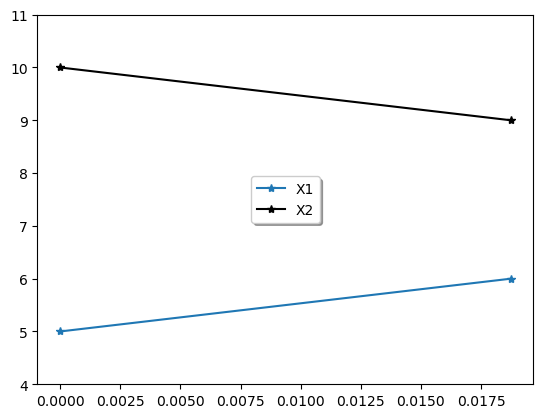

In [9]:
X1_all = np.array([5, 6]) # initial number and number after one reaction
X2_all = np.array([10, 9]) # initial number and number after one reaction
t_all = np.array([0, t]) # initial time and time of one reaction

# create plot
fig, ax = plt.subplots()
plt.ylim((4,11))
ax.plot(t_all, X1_all, '-*', label='X1')
ax.plot(t_all, X2_all, 'k-*', label='X2')
legend = ax.legend(loc='center', shadow=True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initial states
initial_states = [0, 3, 0, 0, 0, 0]

# Parameters (example values, adjust as necessary)
transcription_rate = 50
basal_transcript_rate = 0.01
mRNA_degradation_rate = 1
translation_rate = 5
protein_degradation_rate = 0.1
n = 2  # Hill coefficient

# Gillespie function
def gillespie(initial_states, transcription_rate, basal_transcript_rate, mRNA_degradation_rate, translation_rate, protein_degradation_rate, n, max_time):
    t = 0
    state = np.array(initial_states)
    times = [t]
    states = [state.copy()]

    while t < max_time:
        TetR_mRNA, TetR_protein, cI_mRNA, cI_protein, LacI_mRNA, LacI_protein = state

        # Propensities
        a = np.array([
            (transcription_rate / (1 + LacI_protein ** n)) + basal_transcript_rate,  # production of TetR_mRNA
            mRNA_degradation_rate * TetR_mRNA,  # degradation of TetR_mRNA
            translation_rate * TetR_mRNA,  # production of TetR protein
            protein_degradation_rate * TetR_protein,  # degradation of TetR protein

            (transcription_rate / (1 + TetR_protein ** n)) + basal_transcript_rate,  # production of cI_mRNA
            mRNA_degradation_rate * cI_mRNA,  # degradation of cI_mRNA
            translation_rate * cI_mRNA,  # production of cI protein
            protein_degradation_rate * cI_protein,  # degradation of cI protein

            (transcription_rate / (1 + cI_protein ** n)) + basal_transcript_rate,  # production of LacI_mRNA
            mRNA_degradation_rate * LacI_mRNA,  # degradation of LacI_mRNA
            translation_rate * LacI_mRNA,  # production of LacI protein
            protein_degradation_rate * LacI_protein  # degradation of LacI protein
        ])

        a0 = np.sum(a)
        if a0 == 0:
            break

        r1 = np.random.random()
        tau = (1 / a0) * np.log(1 / r1)

        r2 = np.random.uniform(0, 1)
        cumulative_sum = np.cumsum(a)
        reaction_index = np.searchsorted(cumulative_sum, r2 * a0)

        # Update the system
        state_changes = [
            [1, 0, 0, 0, 0, 0],   # mRNA_TetR production
            [-1, 0, 0, 0, 0, 0],  # mRNA_TetR degradation
            [0, 1, 0, 0, 0, 0],   # protein_TetR production
            [0, -1, 0, 0, 0, 0],  # protein_TetR degradation

            [0, 0, 1, 0, 0, 0],   # mRNA_cI production
            [0, 0, -1, 0, 0, 0],  # mRNA_cI degradation
            [0, 0, 0, 1, 0, 0],   # protein_cI production
            [0, 0, 0, -1, 0, 0],  # protein_cI degradation

            [0, 0, 0, 0, 1, 0],   # mRNA_LacI production
            [0, 0, 0, 0, -1, 0],  # mRNA_LacI degradation
            [0, 0, 0, 0, 0, 1],   # protein_LacI production
            [0, 0, 0, 0, 0, -1],  # protein_LacI degradation
        ]

        state += state_changes[reaction_index]
        t += tau

        times.append(t)
        states.append(state.copy())

    return np.array(times), np.array(states)


# Simulation parameters
max_time = 1000

In [ ]:
# Run the simulation
times, states = gillespie(initial_states, transcription_rate, basal_transcript_rate, mRNA_degradation_rate, translation_rate, protein_degradation_rate, n, max_time)

In [6]:
print(states)
print(times)

mRNA_TetR = states[:, 0]
protein_TetR = states[:, 1]
mRNA_cI = states[:, 2]
protein_cI = states[:, 3]
mRNA_LacI = states[:, 4]
protein_LacI = states[:, 5]

# # Plot the results
# plt.figure(figsize=(12, 8))
# plt.plot(times, protein_TetR, label='Protein TetR')
# plt.plot(times, protein_cI, label='Protein cI')
# plt.plot(times, protein_LacI, label='Protein LacI')
# plt.xlabel('Time')
# plt.ylabel('Molecule Count')
# plt.legend()
# plt.title('Stochastic Simulation of Repressilator using Gillespie Algorithm')
# plt.show()

[[   0    3    0    0    0    0]
 [   1    3    0    0    0    0]
 [   1    3    0    0    1    0]
 ...
 [   0    9    0    8    1 1029]
 [   0    9    0    8    1 1028]
 [   0    9    0    8    1 1027]]
[0.00000000e+00 2.31299099e-02 4.39412330e-02 ... 9.99983854e+02
 9.99985894e+02 1.00002341e+03]


In [20]:
test_array = [1, 2, 3, 4]
summ = np.cumsum(test_array)
print(summ)
next = np.searchsorted(summ, 5)
next

[ 1  3  6 10]


2

In [ ]:
### chatgpt

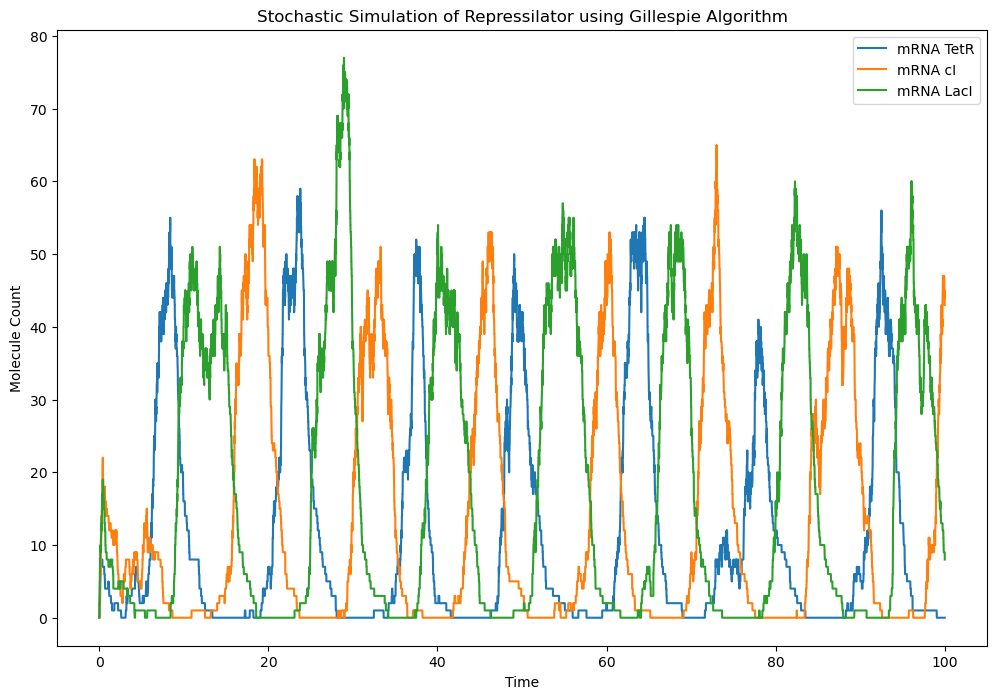

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 50  # Transcription rate
alpha0 = 0.01  # Basal transcription rate
beta = 1  # Translation rate
n = 2  # Hill coefficient
degradation_rate_mRNA = 1
degradation_rate_protein = 1

# Initial state: [mRNA_TetR, protein_TetR, mRNA_cI, protein_cI, mRNA_LacI, protein_LacI]
initial_state = [0, 0, 0, 0, 0, 0]






# Reactions: production and degradation of mRNA and protein
def propensities(state):
    mRNA_TetR, protein_TetR, mRNA_cI, protein_cI, mRNA_LacI, protein_LacI = state
    return [
        alpha / (1 + protein_LacI**n) + alpha0,  # mRNA_TetR production
        degradation_rate_mRNA * mRNA_TetR,       # mRNA_TetR degradation
        beta * mRNA_TetR,                        # protein_TetR production
        degradation_rate_protein * protein_TetR, # protein_TetR degradation

        alpha / (1 + protein_TetR**n) + alpha0,  # mRNA_cI production
        degradation_rate_mRNA * mRNA_cI,         # mRNA_cI degradation
        beta * mRNA_cI,                          # protein_cI production
        degradation_rate_protein * protein_cI,   # protein_cI degradation

        alpha / (1 + protein_cI**n) + alpha0,    # mRNA_LacI production
        degradation_rate_mRNA * mRNA_LacI,       # mRNA_LacI degradation
        beta * mRNA_LacI,                        # protein_LacI production
        degradation_rate_protein * protein_LacI  # protein_LacI degradation
    ]

def gillespie_algorithm(initial_state, propensities, max_time):
    t = 0
    state = np.array(initial_state)
    times = [t]
    states = [state.copy()]

    while t < max_time:
        a = np.array(propensities(state))
        a0 = a.sum()

        if a0 == 0:
            break

        # Time until next reaction
        r1 = np.random.uniform(0, 1)
        tau = (1 / a0) * np.log(1 / r1)

        # Which reaction occurs
        r2 = np.random.uniform(0, 1)
        cumulative_sum = np.cumsum(a)
        reaction_index = np.searchsorted(cumulative_sum, r2 * a0)

        # Update the system
        state_changes = [
            [1, 0, 0, 0, 0, 0],   # mRNA_TetR production
            [-1, 0, 0, 0, 0, 0],  # mRNA_TetR degradation
            [0, 1, 0, 0, 0, 0],   # protein_TetR production
            [0, -1, 0, 0, 0, 0],  # protein_TetR degradation

            [0, 0, 1, 0, 0, 0],   # mRNA_cI production
            [0, 0, -1, 0, 0, 0],  # mRNA_cI degradation
            [0, 0, 0, 1, 0, 0],   # protein_cI production
            [0, 0, 0, -1, 0, 0],  # protein_cI degradation

            [0, 0, 0, 0, 1, 0],   # mRNA_LacI production
            [0, 0, 0, 0, -1, 0],  # mRNA_LacI degradation
            [0, 0, 0, 0, 0, 1],   # protein_LacI production
            [0, 0, 0, 0, 0, -1],  # protein_LacI degradation
        ]

        state += state_changes[reaction_index]
        t += tau

        times.append(t)
        states.append(state.copy())

    return np.array(times), np.array(states)

# Simulation parameters
max_time = 100
	
# Run the simulation
times, states = gillespie_algorithm(initial_state, propensities, max_time)

# Extract data for plotting
mRNA_TetR = states[:, 0]
protein_TetR = states[:, 1]
mRNA_cI = states[:, 2]
protein_cI = states[:, 3]
mRNA_LacI = states[:, 4]
protein_LacI = states[:, 5]

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(times, mRNA_TetR, label='mRNA TetR')
#plt.plot(times, protein_TetR, label='Protein TetR')
plt.plot(times, mRNA_cI, label='mRNA cI')
#plt.plot(times, protein_cI, label='Protein cI')
plt.plot(times, mRNA_LacI, label='mRNA LacI')
#plt.plot(times, protein_LacI, label='Protein LacI')
plt.xlabel('Time')
plt.ylabel('Molecule Count')
plt.legend()
plt.title('Stochastic Simulation of Repressilator using Gillespie Algorithm')
plt.show()
